In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
pd.set_option('display.max_colwidth', 15)

In [2]:
df = pd.read_csv('../data/df_completo.csv')

In [3]:
df

,id,Event,Site,Date,White,Black,Result,BlackElo,ECO,WhiteElo,WhiteWon,BlackWon,Moves,WhiteFinalPiecesCount,BlackFinalPiecesCount,FinalPiecesCount,QueenTrade,Evals,MaxEval,MinEval,FinalEval,W<=10,W<=25,W<=50,W<=100,W<=200,W<=500,W>500,B<=10,B<=25,B<=50,B<=100,B<=200,B<=500,B>500,Wprojection,Bprojection,DifProjection,Plays
0,0,New York,New York,1918,"Morrison, J...","Marshall, F...",0-1,NaN,C89,NaN,0,1,85,1,3,4,0,"[38, 54, 25...",81,-6153,-6153,21,13,13,13,9,2,0,44,18,10,6,4,2,0,1152,-49307,-48155,1. e4 e5 2....
1,1168,New York,New York,1918,"Capablanca,...","Marshall, F...",1-0,NaN,C89,NaN,1,0,36,7,5,12,0,"[35, 43, 27...",99995,27,99995,13,3,5,3,1,0,0,15,5,7,3,4,0,1,215844,0,215844,1. e4 e5 2....
2,1772,Brno,Brno,1921,"Sery, S.","Vecsey, Zoltan",1-0,NaN,C89,NaN,1,0,17,12,10,22,0,"[30, 54, 55...",99999,3,99999,9,2,2,0,0,0,0,9,5,0,1,0,0,1,201848,0,201848,1. e4 e5 2....
3,2129,NLD-ch,Nijmegen,1921,"Te Kolste, ...","Loman, Rudolf",0-1,NaN,C89,NaN,0,1,19,11,10,21,0,"[37, 48, 46...",133,-972,-972,9,3,2,0,1,0,1,8,6,1,2,1,0,0,2030,-1888,142,1. e4 e5 2....
4,2522,USA sim,USA,1926,"Lasker, Ema...","Bigelow, Ho...",0-1,NaN,C89,NaN,0,1,20,11,11,22,0,"[26, 50, 52...",109,-1187,-1187,9,2,2,0,0,3,0,15,2,1,1,0,0,0,1406,-6514,-5108,1. e4 e5 2....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,2113381,23rd Europe...,Terme Catez,2021,"Agopov,M","Ragger,M",1/2-1/2,2668.0,C89,2430.0,0,0,55,2,1,3,1,"[26, 28, 27...",417,-49,-49,17,15,7,4,1,2,0,32,7,6,6,1,2,0,15091,-100,14991,1. e4 e5 2....
2980,2117758,8th Sunway ...,Sitges,2021,"Kurmann,O","Van Dael,Siem",1-0,2300.0,C89,2466.0,1,0,51,8,5,13,0,"[25, 50, 41...",99999,0,99999,19,8,5,5,3,1,0,22,7,9,5,3,2,2,821040,0,821040,1. e4 e5 2....
2981,2118961,7th Gashimo...,Baku,2021,"Karjakin,Se...","Caruana,F",1/2-1/2,2792.0,C89,2743.0,0,0,37,4,4,8,1,"[24, 37, 35...",102,-8,0,16,12,2,0,1,0,0,25,6,3,2,0,0,0,2788,-9,2779,1. e4 e5 2....
2982,2119588,World Rapid...,Warsaw,2021,"Loskutova,V...","Abdumalik,Z",1-0,2491.0,C89,2100.0,1,0,42,6,5,11,1,"[34, 54, 45...",778,-8,778,19,8,4,2,0,0,0,20,8,5,6,1,1,0,25803,-8,25795,1. e4 e5 2....


C:\Users\edupo\AppData\Local\Temp\ipykernel_17716\1079579556.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


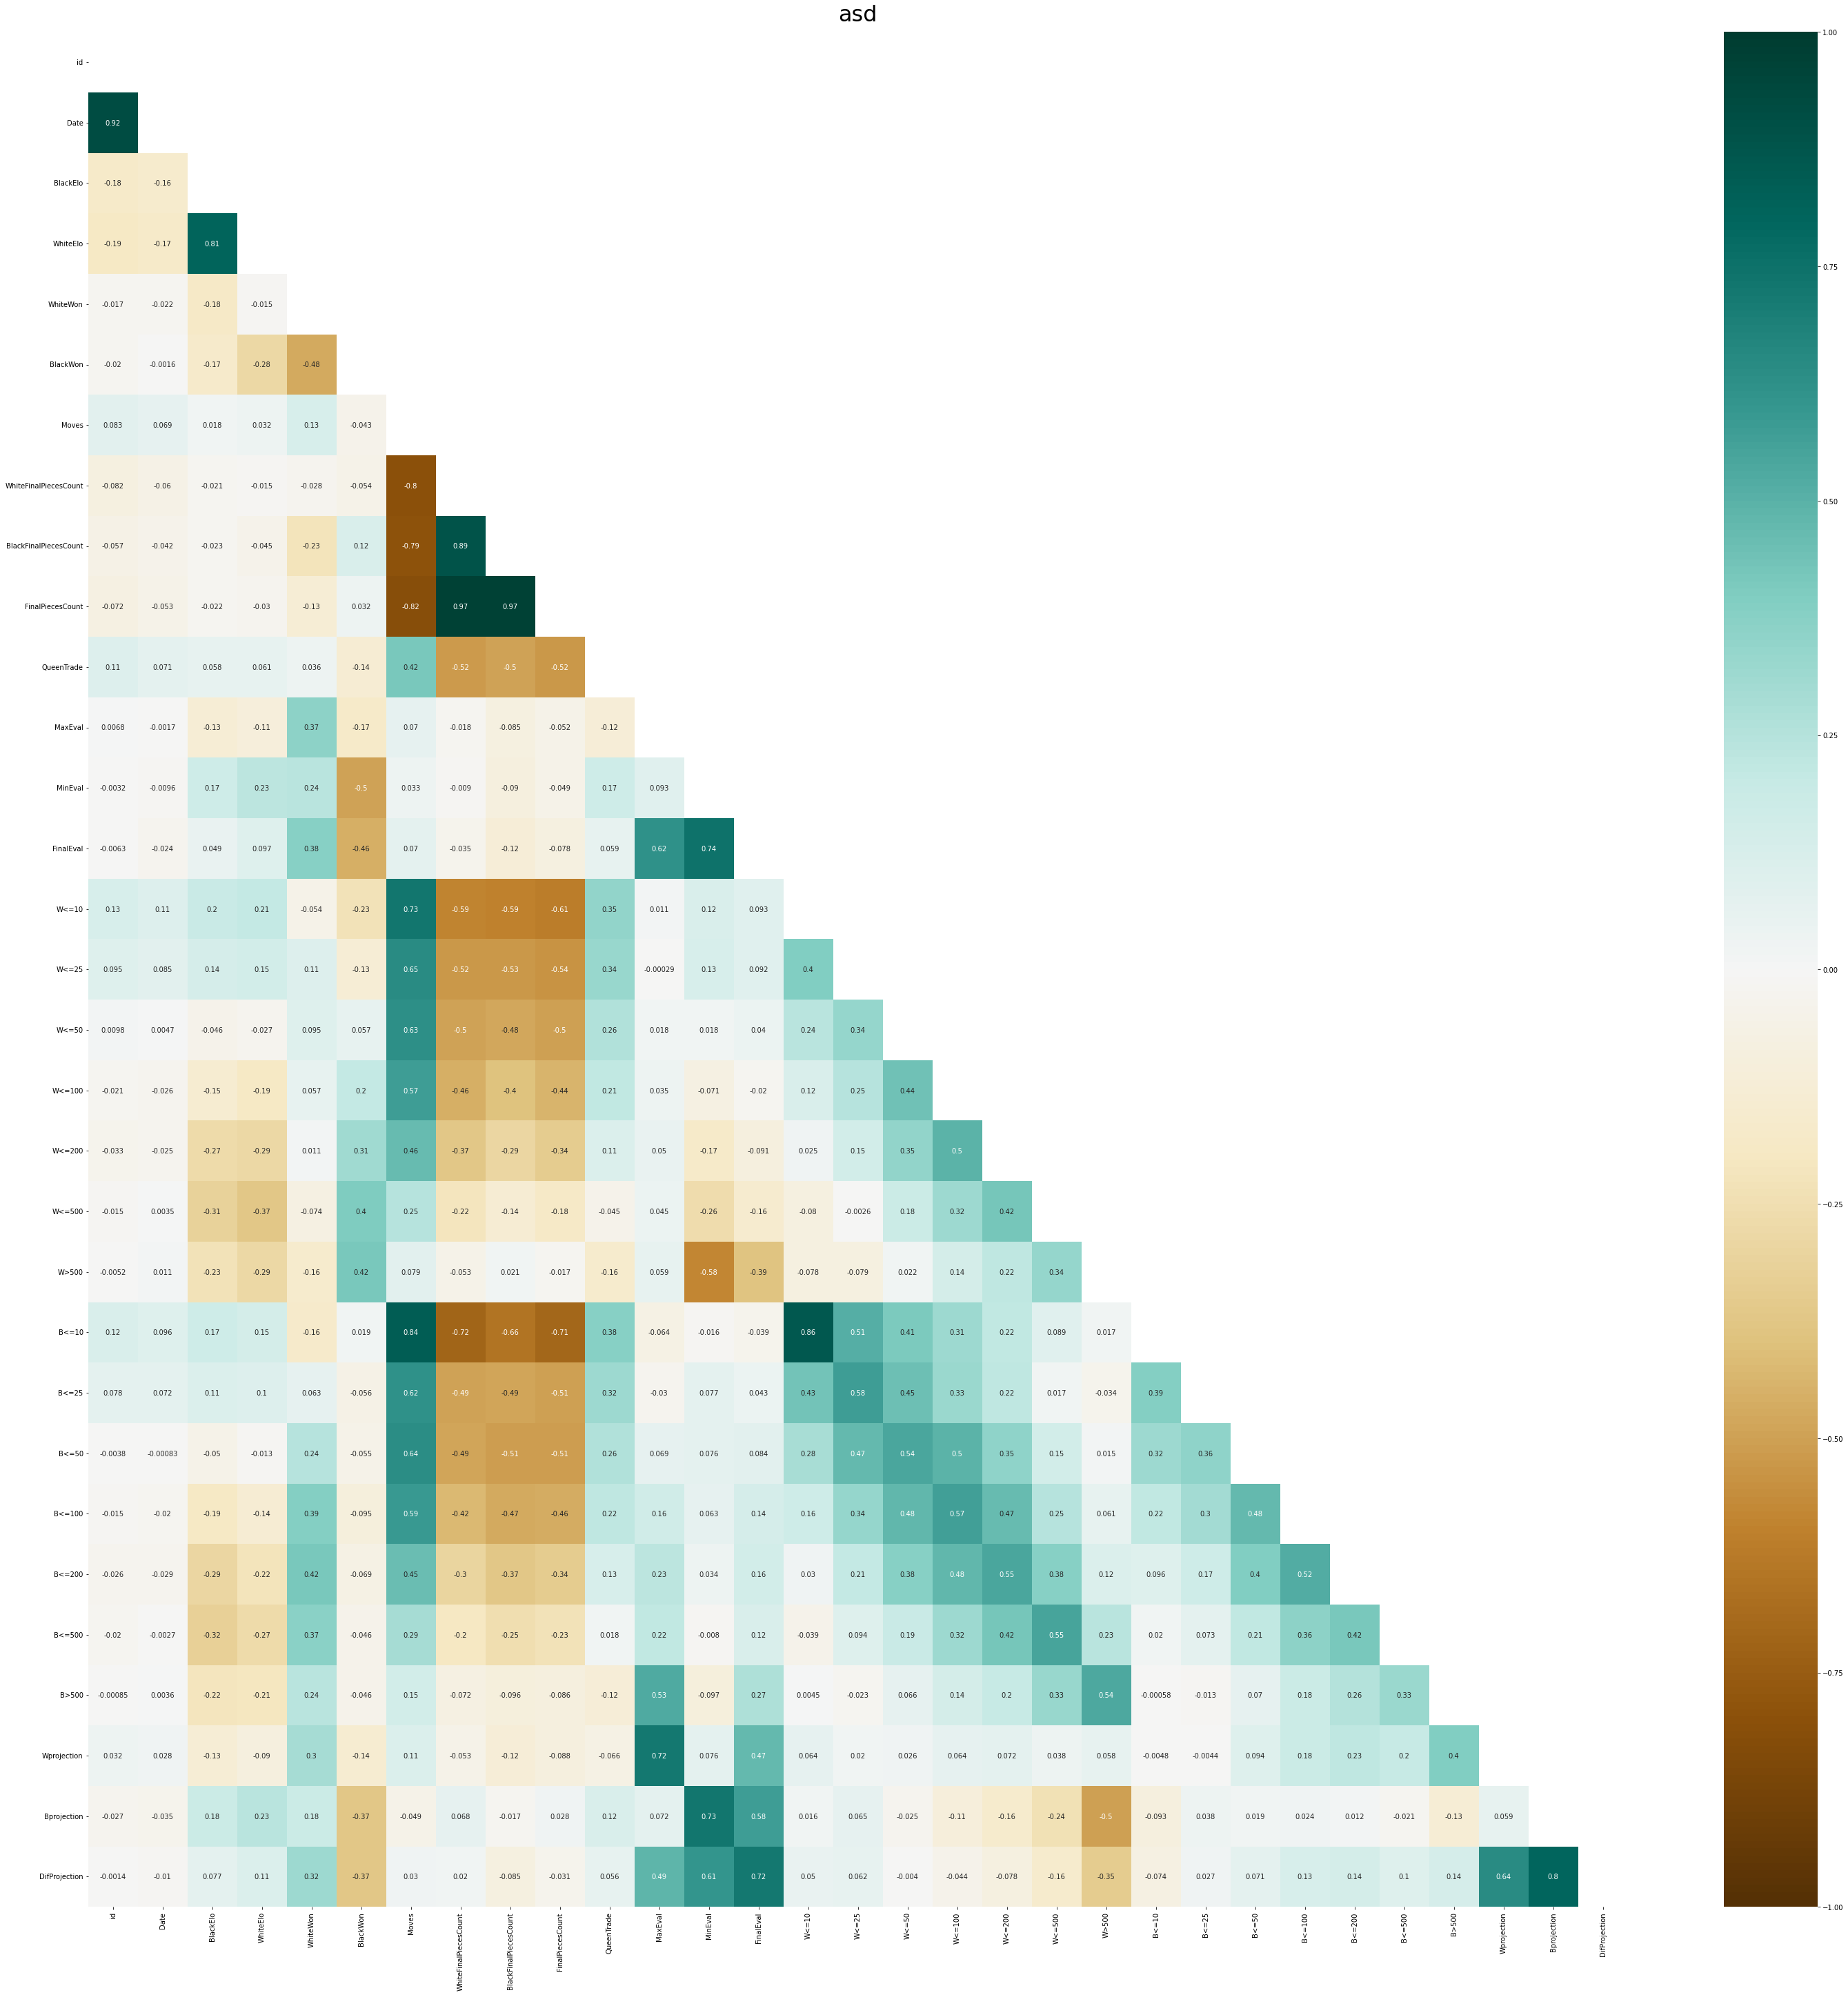

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(50, 50))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('asd', fontdict={'fontsize':32}, pad=16);